In [179]:
import sqlite3

import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

In [180]:
conn = sqlite3.connect("backup/data.db")
q = "SELECT * FROM posts"
df = pd.read_sql_query(q, conn)
df.head()

,index,angry,created_time,haha,id,like,love,message,parent_id,sad,source,tagged_user_id,tagged_user_name,tagged_user_type,total_reactions,type,wow
0,0,0.0,2018-02-14T09:50:00+0000,28.0,323288791493138_329592980862719,74.0,1.0,#1130 הדבר הכי מביך שקרה לי עד כה- ישבתי בספרי...,None,0.0,HUJI,None,None,None,103.0,POST,0.0
1,1,0.0,2018-02-14T09:40:00+0000,3.0,323288791493138_329590724196278,16.0,0.0,"#1129 גברים וגברות היום ולנטיינז, זה הרגע שלכם...",None,0.0,HUJI,None,None,None,19.0,POST,0.0
2,2,0.0,2018-02-14T09:30:00+0000,0.0,323288791493138_329592804196070,17.0,0.0,#1128 לכל מי שמתרץ את עניין הרמאויות וההעתקות ...,None,0.0,HUJI,None,None,None,17.0,POST,0.0
3,3,0.0,2018-02-14T09:20:03+0000,17.0,323288791493138_329598080862209,58.0,2.0,יוזמה נהדרת!,None,0.0,HUJI,None,None,None,77.0,POST,0.0
4,4,0.0,2018-02-14T09:20:00+0000,2.0,323288791493138_329590930862924,5.0,0.0,#1127 אולי מישהו ירים כבר את הכפפה ויפתח קבוצת...,None,0.0,HUJI,None,None,None,7.0,POST,0.0


In [181]:
df.groupby(["type"]).agg(["count"])["index"]

,count
type,
COMMENT,51847
POST,7606
TAG,42758


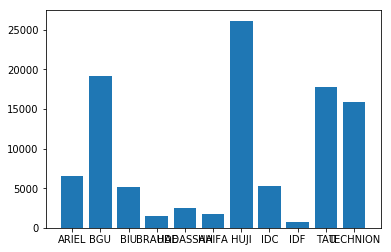

In [182]:
u_df = df.groupby(["source"]).agg(["count"])["index"].reset_index().sort_values(["count"])
plt.bar(u_df["source"], u_df["count"])
plt.show()

Extract manual post id from the posts:

In [183]:
ID_REGEX = "(#\d+|\d+#){1}"
df["id"] = df["message"].str.findall(ID_REGEX).str.get(0)
df["message"].str
df["reply_to"] = df["message"].str.findall(ID_REGEX).str.get(1)
df["message"] = df["message"].str.replace(ID_REGEX, "")
df.head()

,index,angry,created_time,haha,id,like,love,message,parent_id,sad,source,tagged_user_id,tagged_user_name,tagged_user_type,total_reactions,type,wow,reply_to
0,0,0.0,2018-02-14T09:50:00+0000,28.0,#1130,74.0,1.0,הדבר הכי מביך שקרה לי עד כה- ישבתי בספריה ללמ...,None,0.0,HUJI,None,None,None,103.0,POST,0.0,NaN
1,1,0.0,2018-02-14T09:40:00+0000,3.0,#1129,16.0,0.0,"גברים וגברות היום ולנטיינז, זה הרגע שלכם לבדו...",None,0.0,HUJI,None,None,None,19.0,POST,0.0,NaN
2,2,0.0,2018-02-14T09:30:00+0000,0.0,#1128,17.0,0.0,לכל מי שמתרץ את עניין הרמאויות וההעתקות במבחנ...,None,0.0,HUJI,None,None,None,17.0,POST,0.0,NaN
3,3,0.0,2018-02-14T09:20:03+0000,17.0,NaN,58.0,2.0,יוזמה נהדרת!,None,0.0,HUJI,None,None,None,77.0,POST,0.0,NaN
4,4,0.0,2018-02-14T09:20:00+0000,2.0,#1127,5.0,0.0,אולי מישהו ירים כבר את הכפפה ויפתח קבוצת ״בחו...,None,0.0,HUJI,None,None,None,7.0,POST,0.0,NaN


Mark question posts:

In [184]:
df.loc[df["message"].str.find("?") > 0, "is_question"] = True
df["is_question"] = df["is_question"].fillna(False)
df.head()

,index,angry,created_time,haha,id,like,love,message,parent_id,sad,source,tagged_user_id,tagged_user_name,tagged_user_type,total_reactions,type,wow,reply_to,is_question
0,0,0.0,2018-02-14T09:50:00+0000,28.0,#1130,74.0,1.0,הדבר הכי מביך שקרה לי עד כה- ישבתי בספריה ללמ...,None,0.0,HUJI,None,None,None,103.0,POST,0.0,NaN,False
1,1,0.0,2018-02-14T09:40:00+0000,3.0,#1129,16.0,0.0,"גברים וגברות היום ולנטיינז, זה הרגע שלכם לבדו...",None,0.0,HUJI,None,None,None,19.0,POST,0.0,NaN,False
2,2,0.0,2018-02-14T09:30:00+0000,0.0,#1128,17.0,0.0,לכל מי שמתרץ את עניין הרמאויות וההעתקות במבחנ...,None,0.0,HUJI,None,None,None,17.0,POST,0.0,NaN,False
3,3,0.0,2018-02-14T09:20:03+0000,17.0,NaN,58.0,2.0,יוזמה נהדרת!,None,0.0,HUJI,None,None,None,77.0,POST,0.0,NaN,False
4,4,0.0,2018-02-14T09:20:00+0000,2.0,#1127,5.0,0.0,אולי מישהו ירים כבר את הכפפה ויפתח קבוצת ״בחו...,None,0.0,HUJI,None,None,None,7.0,POST,0.0,NaN,False


Creates a clean message column:

In [185]:
df['clean_message'] = df['message'].str.replace("[^א-ת ]", "")
df['clean_message'] = df['clean_message'].str.replace("[\s]", " ")

Export analyzed df to sql:

In [186]:
df.to_sql("posts", sqlite3.connect("analyzed_data.db"), if_exists="replace")

In [187]:
words_counter = Counter(df["clean_message"].str.cat(sep="").split(" "))

In [188]:
words_counter_df = pd.DataFrame.from_dict(words_counter, orient='index').reset_index()
words_counter_df.head()

,index,0
0,,66023
1,הדבר,279
2,הכי,1282
3,מביך,90
4,שקרה,56


In [206]:
df[["source", "clean_message"]].groupby(["source"]).agg(lambda x: list(x.str.split(" ")))

,clean_message
source,
ARIEL,"[[שאני, אבין, אין, בחורים, גבוהים, באוניברסיטה..."
BGU,"[[, פרסמו, וידוי, שלי, במכללה, שבה, אני, לומדת..."
BIU,"[[, שוקלת, לעבור, תואר, רק, בשביל, ללמוד, אצל,..."
BRAUDE,"[[, מה, עם, הערומה, מהמעונות, מישהו, צילם], [,..."
HADASSAH,"[[, בשנה, א, הייתה, מרצה, אחת, שממש, שנאתי, ופ..."
HAIFA,"[[, יום, הדין, הוא, היום, בו, חובלים, וחבצלות,..."
HUJI,"[[, הדבר, הכי, מביך, שקרה, לי, עד, כה, ישבתי, ..."
IDC,"[[, אני, , מוזרה, באמת, שאין, ספק, אבל, ברצינו..."
IDF,"[[, בסיום, בהד, , העמדנו, מסדר, על, המגורים, ו..."


#### Get the replies for each comment

#### Get the name of the commenter (for each comment or reply)

#### Get the commenter gender

#### Get the posts a user reacted to or commented to

#### Get a list of the users commented or reacted

#### Calculate the feeling in each institute